In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
blockdf=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\ethdata.csv")
pricedf=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\priceandvolume.csv",thousands=',')
addresses=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\uniqueaddresses.csv")
trend=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\googletrends.csv")

In [3]:
#importing new financial/econimic data 4/30 
DSI=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\DSI.csv")
GOLD=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\GOLD.csv")
OIL=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\OIL.csv")
SPY=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\SPY.csv")
FEAR=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\VIX.csv")


In [4]:
#DSI.head()
DSI['date'] = pd.to_datetime(DSI['observation_date'])
DSI.set_index('date' ,inplace=True)


In [5]:
DSI.head()

,observation_date,DTWEXB
date,,
2014-12-31,2014-12-31,111.0738
2015-01-01,2015-01-01,NaN
2015-01-02,2015-01-02,111.6852
2015-01-05,2015-01-05,112.3254
2015-01-06,2015-01-06,112.1016


In [6]:
blockdf.head()
blockdf['Date'] = pd.to_datetime(blockdf['date'])
blockdf.set_index('Date' ,inplace=True)
blockdf.drop(columns=['date'])

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet30d
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-30,9206,6911,4449897,643.886124,NaN,1.210000e+11,NaN,NaN,NaN,NaN,...,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN
2015-07-31,424,6863,3994458,582.027976,NaN,6.030000e+11,NaN,NaN,NaN,NaN,...,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN
2015-08-01,413,5293,3044344,575.164179,NaN,8.870000e+11,NaN,NaN,NaN,NaN,...,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN
2015-08-02,432,5358,3112348,580.878686,NaN,1.020000e+12,NaN,NaN,NaN,NaN,...,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN
2015-08-03,444,5280,3099953,587.112311,NaN,1.130000e+12,NaN,NaN,NaN,NaN,...,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-20,317504,6480,151740186,23416.695370,2.839381e+10,2.270000e+15,0.000747,0.193184,0.000315,0.081469,...,321526,2.258502e+06,584120560.0,8.736648,2259.575676,0.060037,15.527463,2809059.557,726512329.0,0.042019
2020-02-21,323587,6475,144159611,22264.032590,2.919638e+10,2.240000e+15,0.000511,0.135858,0.000210,0.055841,...,321502,1.642300e+06,436703111.5,6.075972,1615.658097,0.050079,13.316373,1953437.154,519437309.6,0.041843
2020-02-22,314925,6528,130585383,20003.888330,2.874473e+10,2.280000e+15,0.000505,0.132280,0.000210,0.055092,...,315424,9.484958e+05,248281461.4,3.519405,921.251394,0.039765,10.409089,1110104.876,290584800.0,0.041281


In [7]:
GOLD.head()
GOLD['Date'] = pd.to_datetime(GOLD['Date'])
GOLD.set_index('Date' ,inplace=True)

In [8]:
OIL.head()
OIL['Date'] = pd.to_datetime(OIL['Date'])
OIL.set_index('Date' ,inplace=True)

In [9]:
SPY.head()
SPY['Date'] = pd.to_datetime(SPY['Date'])
SPY.set_index('Date' ,inplace=True)

In [10]:
FEAR.head()
FEAR['Date'] = pd.to_datetime(FEAR['Date'])
FEAR.set_index('Date' ,inplace=True)

In [11]:
#set index to datetime
blockdf['Date'] = pd.to_datetime(blockdf['date'])
blockdf.set_index('Date' ,inplace=True)

In [12]:
addresses.head()

,date,address_count
0,7/30/2015,9203
1,7/31/2015,9359
2,8/1/2015,9474
3,8/2/2015,9561
4,8/3/2015,9637


In [13]:
#set index to datetime
addresses['Date'] = pd.to_datetime(addresses['date'])
addresses.set_index('Date' ,inplace=True)
addresses.drop(columns=['date'])

,address_count
Date,
2015-07-30,9203
2015-07-31,9359
2015-08-01,9474
2015-08-02,9561
2015-08-03,9637
...,...
2020-02-20,35185543
2020-02-21,35185543
2020-02-22,35185543


In [14]:
addresses.head()

,date,address_count
Date,,
2015-07-30,7/30/2015,9203
2015-07-31,7/31/2015,9359
2015-08-01,8/1/2015,9474
2015-08-02,8/2/2015,9561
2015-08-03,8/3/2015,9637


In [15]:
#merging identified data
df = blockdf
#df['PriceUSD']=blockdf['PriceUSD'] #removing this is have pricing from another dataframe
df['TxCnt']=blockdf['TxCnt']
df['FeeMeanUSD']=blockdf['FeeMeanUSD']
df['AdrActCnt']=blockdf['AdrActCnt']
df['TotalAddresses']=addresses['address_count']

In [16]:
addresses.head()
pricedf.dtypes

Date           object
Open*         float64
High          float64
Low           float64
Close**       float64
Volume          int64
Market Cap      int64
dtype: object

In [17]:
df.dtypes

date                object
AdrActCnt            int64
BlkCnt               int64
BlkSizeByte          int64
BlkSizeMeanByte    float64
CapMrktCurUSD      float64
DiffMean           float64
FeeMeanNtv         float64
FeeMeanUSD         float64
FeeMedNtv          float64
FeeMedUSD          float64
FeeTotNtv          float64
FeeTotUSD          float64
HashRate           float64
IssContNtv         float64
IssContPctAnn      float64
IssContUSD         float64
IssTotNtv          float64
IssTotUSD          float64
NVTAdj             float64
PriceBTC           float64
SplyCur            float64
TxCnt                int64
TxTfrCnt             int64
TxTfrValAdjNtv     float64
TxTfrValAdjUSD     float64
TxTfrValMeanNtv    float64
TxTfrValMeanUSD    float64
TxTfrValMedNtv     float64
TxTfrValMedUSD     float64
TxTfrValNtv        float64
TxTfrValUSD        float64
VtyDayRet30d       float64
TotalAddresses       int64
dtype: object

In [18]:
df.drop(columns='date')

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet30d,TotalAddresses
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-30,9206,6911,4449897,643.886124,NaN,1.210000e+11,NaN,NaN,NaN,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,9203
2015-07-31,424,6863,3994458,582.027976,NaN,6.030000e+11,NaN,NaN,NaN,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,9359
2015-08-01,413,5293,3044344,575.164179,NaN,8.870000e+11,NaN,NaN,NaN,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,9474
2015-08-02,432,5358,3112348,580.878686,NaN,1.020000e+12,NaN,NaN,NaN,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,9561
2015-08-03,444,5280,3099953,587.112311,NaN,1.130000e+12,NaN,NaN,NaN,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,9637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-20,317504,6480,151740186,23416.695370,2.839381e+10,2.270000e+15,0.000747,0.193184,0.000315,0.081469,...,2.258502e+06,584120560.0,8.736648,2259.575676,0.060037,15.527463,2809059.557,726512329.0,0.042019,35185543
2020-02-21,323587,6475,144159611,22264.032590,2.919638e+10,2.240000e+15,0.000511,0.135858,0.000210,0.055841,...,1.642300e+06,436703111.5,6.075972,1615.658097,0.050079,13.316373,1953437.154,519437309.6,0.041843,35185543
2020-02-22,314925,6528,130585383,20003.888330,2.874473e+10,2.280000e+15,0.000505,0.132280,0.000210,0.055092,...,9.484958e+05,248281461.4,3.519405,921.251394,0.039765,10.409089,1110104.876,290584800.0,0.041281,35185543


In [19]:
#To do: Merge in exchange data and trend data

In [20]:
#set index to datetime
trend['date'] = pd.to_datetime(trend['Week'])
trend.set_index('date' ,inplace=True)


In [21]:
df['Trend']=trend['ethereum: (United States)']

In [22]:
df.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet30d,TotalAddresses,Trend
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-30,7/30/2015,9206,6911,4449897,643.886124,NaN,1.210000e+11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9203,NaN
2015-07-31,7/31/2015,424,6863,3994458,582.027976,NaN,6.030000e+11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9359,NaN
2015-08-01,8/1/2015,413,5293,3044344,575.164179,NaN,8.870000e+11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9474,NaN
2015-08-02,8/2/2015,432,5358,3112348,580.878686,NaN,1.020000e+12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9561,1.0
2015-08-03,8/3/2015,444,5280,3099953,587.112311,NaN,1.130000e+12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9637,NaN


In [23]:
SPY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-04,2110.229980,2120.949951,2110.229980,2114.489990,2114.489990,3091580000
2015-05-05,2112.629883,2115.239990,2088.459961,2089.459961,2089.459961,3793950000
2015-05-06,2091.260010,2098.419922,2067.929932,2080.149902,2080.149902,3792210000
2015-05-07,2079.959961,2092.899902,2074.989990,2088.000000,2088.000000,3676640000
2015-05-08,2092.129883,2117.659912,2092.129883,2116.100098,2116.100098,3399440000


In [24]:
#set index to datetime
df['Trend'].fillna(method='ffill',inplace=True) 
#df['trend'].interpolate(method='linear', limit_direction='forward',inplace=True) 

In [25]:
df['Oil']=OIL['Open']
df['Gold']=GOLD['Open']
df['Fear']=FEAR['Open']
df['Dollar']=DSI['DTWEXB']
df['Stocks']=SPY['Open']

In [26]:
#Securities do not trade over the weekend or on holidays, need a placeholder value
df['Oil'].fillna(method='ffill',inplace=True) 
df['Gold'].fillna(method='ffill',inplace=True) 
df['Fear'].fillna(method='ffill',inplace=True) 
df['Dollar'].fillna(method='ffill',inplace=True) 
df['Stocks'].fillna(method='ffill',inplace=True) 

In [27]:
#set index to datetime
pricedf['date'] = pd.to_datetime(pricedf['Date'])
pricedf.set_index('date' ,inplace=True)

In [28]:
#merge in exchange data
df['Open']=pricedf['Open*']
df['Close']=pricedf['Close**']
df['High']=pricedf['High']
df['Low']=pricedf['Low']
df['Volume']=pricedf['Volume']


In [29]:
df.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,...,Oil,Gold,Fear,Dollar,Stocks,Open,Close,High,Low,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-30,7/30/2015,9206,6911,4449897,643.886124,NaN,1.210000e+11,NaN,NaN,NaN,...,1096.099976,48.830002,12.72,118.2980,2106.780029,NaN,NaN,NaN,NaN,NaN
2015-07-31,7/31/2015,424,6863,3994458,582.027976,NaN,6.030000e+11,NaN,NaN,NaN,...,1087.699951,48.470001,12.03,117.6531,2111.600098,NaN,NaN,NaN,NaN,NaN
2015-08-01,8/1/2015,413,5293,3044344,575.164179,NaN,8.870000e+11,NaN,NaN,NaN,...,1087.699951,48.470001,12.03,117.6531,2111.600098,NaN,NaN,NaN,NaN,NaN
2015-08-02,8/2/2015,432,5358,3112348,580.878686,NaN,1.020000e+12,NaN,NaN,NaN,...,1087.699951,48.470001,12.03,117.6531,2111.600098,NaN,NaN,NaN,NaN,NaN
2015-08-03,8/3/2015,444,5280,3099953,587.112311,NaN,1.130000e+12,NaN,NaN,NaN,...,1095.500000,46.860001,12.85,118.1050,2104.489990,NaN,NaN,NaN,NaN,NaN


In [30]:
#removing a few rows that didnt have price data bc ethereum not traded
df = df.truncate(after = '2020-02-23 00:00:00', before = '2015-08-08 00:00:00') 
df = df.truncate(after = '2020-02-23 00:00:00', before = '2018-04-05 00:00:00') 

In [31]:
df['Spread']=df['High']-df['Low']

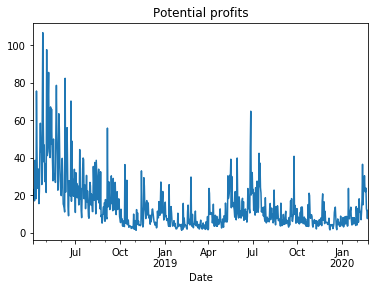

In [32]:
#Calculating the potential intraday profit, if you were to buy at the high and sell at the low, might do something with this later
df['Spread'].plot(title="Potential profits")

In [33]:
df.describe()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,Gold,Fear,Dollar,Stocks,Open,Close,High,Low,Volume,Spread
count,690.000000,690.000000,6.900000e+02,690.000000,6.900000e+02,6.900000e+02,690.000000,690.000000,690.000000,690.000000,...,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,6.900000e+02,690.000000
mean,304986.147826,6030.273913,1.304320e+08,21669.569930,2.592440e+10,2.614551e+15,0.000874,0.235802,0.000347,0.089414,...,60.240681,15.802681,127.070772,2880.052110,251.750043,251.568449,258.547884,244.090348,5.561530e+09,14.457536
std,54325.043695,492.317223,2.334262e+07,3618.361457,1.497354e+10,5.343810e+14,0.000897,0.403462,0.000244,0.113540,...,7.009135,3.571844,2.901233,196.633415,153.730558,153.613627,158.273172,148.009773,4.300288e+09,14.198889
min,171484.000000,4139.000000,7.993359e+07,13665.922840,8.599427e+09,1.720000e+15,0.000373,0.050078,0.000063,0.014743,...,42.849998,10.930000,117.245200,2363.120117,84.280000,84.310000,85.340000,82.830000,9.484880e+08,1.210000
25%,269264.500000,5841.000000,1.136750e+08,18987.023838,1.608300e+10,2.180000e+15,0.000593,0.098886,0.000219,0.038630,...,54.732501,13.045000,126.168050,2737.877563,150.622500,150.470000,155.132500,147.397500,1.996098e+09,5.175000
50%,299344.000000,6112.500000,1.315859e+08,21493.099960,2.042044e+10,2.470000e+15,0.000686,0.138633,0.000297,0.057835,...,58.880001,14.890000,127.759650,2861.229981,193.675000,193.795000,198.955000,187.820000,4.583746e+09,9.575000
75%,336047.000000,6408.750000,1.432628e+08,24217.266742,2.886996e+10,3.150000e+15,0.000825,0.215357,0.000404,0.087718,...,66.620003,17.522500,128.927250,2983.107483,277.655000,276.010000,284.932500,267.877500,7.858769e+09,18.160000
max,644295.000000,6592.000000,3.793044e+08,58220.161470,8.053070e+10,3.610000e+15,0.011975,5.700029,0.002604,1.202401,...,76.180000,35.500000,131.880800,3380.449951,816.090000,816.120000,835.060000,784.240000,2.651148e+10,106.850000


In [34]:

#All NAS are gone! DF is compelte!
#Machine learning time
df[df.isnull().any(axis=1)]

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,...,Gold,Fear,Dollar,Stocks,Open,Close,High,Low,Volume,Spread
Date,,,,,,,,,,,,,,,,,,,,,


In [35]:
df.drop(columns=['date'])

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,Gold,Fear,Dollar,Stocks,Open,Close,High,Low,Volume,Spread
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-05,372734,6056,118066688,19495.82034,3.774963e+10,3.150000e+15,0.000702,0.268578,0.000111,0.042394,...,63.599998,19.76,117.8583,2657.360107,379.95,383.23,387.72,369.82,1.210680e+09,17.90
2018-04-06,350661,6051,107519299,17768.84796,3.649814e+10,3.260000e+15,0.000544,0.201162,0.000085,0.031359,...,63.700001,20.33,117.9479,2645.820068,382.73,370.29,385.20,366.91,9.671060e+08,18.29
2018-04-07,293326,6049,95762080,15831.05968,3.794346e+10,3.240000e+15,0.000453,0.174152,0.000084,0.032231,...,63.700001,20.33,117.9479,2645.820068,370.38,385.31,393.06,369.94,9.514750e+08,23.12
2018-04-08,309376,6058,104396062,17232.76032,3.942276e+10,3.190000e+15,0.000474,0.189361,0.000084,0.033551,...,63.700001,20.33,117.9479,2645.820068,385.74,400.51,402.59,385.60,9.484880e+08,16.99
2018-04-09,319374,5995,111688105,18630.20934,3.911000e+10,3.090000e+15,0.000504,0.199732,0.000086,0.034110,...,62.000000,21.27,117.7151,2617.179932,400.86,398.53,429.25,390.61,1.478390e+09,38.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-19,333141,6557,150875404,23009.82217,2.865874e+10,2.310000e+15,0.000703,0.183568,0.000295,0.077104,...,52.119999,14.66,128.0097,3380.389893,282.04,259.76,283.54,259.76,2.267941e+10,23.78
2020-02-20,317504,6480,151740186,23416.69537,2.839381e+10,2.270000e+15,0.000747,0.193184,0.000315,0.081469,...,53.500000,14.54,128.0097,3380.449951,259.82,257.95,263.70,250.95,2.322983e+10,12.75
2020-02-21,323587,6475,144159611,22264.03259,2.919638e+10,2.240000e+15,0.000511,0.135858,0.000210,0.055841,...,53.740002,17.33,128.0097,3360.500000,257.89,265.60,267.00,255.69,2.086759e+10,11.31


In [36]:
#import necessary libraries for transformations and for xgboost, credit goes to https://www.kaggle.com/mtszkw/stock-trend-and-prices-prediction-using-xgboost
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)



In [37]:
# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'


# Show charts when running kernel
init_notebook_mode(connected=True)
#Need to trim dataframe to a window so that I can actually run functions aginst it



fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=df.index,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [38]:
#Moving averages
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()
df['SMA_30'] = df['Close'].rolling(30).mean().shift()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df.SMA_5, name='5 day'))
fig.add_trace(go.Scatter(x=df.index, y=df.SMA_15, name='15 day'))
fig.add_trace(go.Scatter(x=df.index, y=df.SMA_30, name='30 day'))
fig.add_trace(go.Scatter(x=df.index, y=df.Close, name='Close', opacity=0.2))
fig.update_layout(
    title="Simple Moving Averages",
    xaxis_title="Date",
    yaxis_title="Ethereum Price",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"))
fig.show()

In [39]:
#remove datetime index
modified = df.reset_index()
modified.head()
df=modified

In [40]:
#Definition taken from:https://www.kaggle.com/wangqiyuan/stock-trend-and-prices-prediction-using-xgboost/notebook
def relative_strength_idx(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    Up = delta.copy()
    Down = delta.copy()
    Up[Up < 0] = 0
    Down[Down > 0] = 0
    rollUp = Up.rolling(n).mean()
    rollDown = Down.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = relative_strength_idx(df).fillna(0)

fig = go.Figure(go.Scatter(x=df.Date, y=df.RSI, name='RSI'))
fig.show()

In [41]:
#Create MACD feature, when MACD crosses signal line that is a buy signal. Click to zoom in on graph
EMA_12 = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD'], name='MACD'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD_signal'], name='Signal'), row=1, col=1)
fig.show()

In [42]:
#Shift label column because I want to predict next days closing price

df['Close'] = df['Close'].shift(-1)

In [43]:
df = df.iloc[33:] # Need to remove due to MACD creating NAN values
df = df[:-1]      # Because of shifting close price

#df.index = range(len(df))

In [44]:
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(df.shape[0] * (1-test_size))
valid_split_idx = int(df.shape[0] * (1-(valid_size+test_size)))

train  = df.loc[:valid_split_idx].copy()
valid  = df.loc[valid_split_idx+1:test_split_idx].copy()
test   = df.loc[test_split_idx+1:].copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.Date, y=train.Close, name='Training'))
fig.add_trace(go.Scatter(x=valid.Date, y=valid.Close, name='Validation'))
fig.add_trace(go.Scatter(x=test.Date,  y=test.Close,  name='Test'))
fig.show()

In [45]:
#removing the other exchange High and Low columns as these would all be unknown
drop_cols = ['Date','date', 'Volume','Low', 'High']

train = train.drop(drop_cols, 1)
valid = valid.drop(drop_cols, 1)
test  = test.drop(drop_cols, 1)

In [46]:
y_train = train['Close'].copy()
X_train = train.drop(['Close'], 1)

y_valid = valid['Close'].copy()
X_valid = valid.drop(['Close'], 1)

y_test  = test['Close'].copy()
X_test  = test.drop(['Close'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 33 to 459
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AdrActCnt        427 non-null    int64  
 1   BlkCnt           427 non-null    int64  
 2   BlkSizeByte      427 non-null    int64  
 3   BlkSizeMeanByte  427 non-null    float64
 4   CapMrktCurUSD    427 non-null    float64
 5   DiffMean         427 non-null    float64
 6   FeeMeanNtv       427 non-null    float64
 7   FeeMeanUSD       427 non-null    float64
 8   FeeMedNtv        427 non-null    float64
 9   FeeMedUSD        427 non-null    float64
 10  FeeTotNtv        427 non-null    float64
 11  FeeTotUSD        427 non-null    float64
 12  HashRate         427 non-null    float64
 13  IssContNtv       427 non-null    float64
 14  IssContPctAnn    427 non-null    float64
 15  IssContUSD       427 non-null    float64
 16  IssTotNtv        427 non-null    float64
 17  IssTotUSD      

In [47]:


%%time


parameters = {
    'n_estimators': [1000],
    'learning_rate': [0.2],
    'max_depth': [18],
    'gamma': [0.6],
    'random_state': [50]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best paramaters: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best paramaters: {'gamma': 0.6, 'learning_rate': 0.2, 'max_depth': 18, 'n_estimators': 1000, 'random_state': 50}
Best validation score = -0.15445026456363375
Wall time: 49.4 s


In [48]:
#df.dtypes

In [49]:
%%time
  
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

Wall time: 8.95 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.6,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=18, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=50, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [50]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:10]}')
print(f'y_pred = {y_pred[:10]}')

y_true = [176.01 178.03 173.62 172.91 175.53 174.92 172.3  162.4  162.17 181.52]
y_pred = [196.4597  170.0818  169.75798 175.63893 171.05762 165.35646 169.89009
 169.90971 165.97984 168.95375]


In [51]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 105.5269993600109


In [52]:
predicted_prices = df.loc[test_split_idx+1:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                         name='Actual',
                         marker_color='Blue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='Red'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Actual',
                         marker_color='Blue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='Red',
                         showlegend=False), row=2, col=1)

fig.show()

In [55]:
print(f'y_true = {np.array(y_test)[:]}')
print(f'y_pred = {y_pred[:]}')

y_true = [176.01 178.03 173.62 172.91 175.53 174.92 172.3  162.4  162.17 181.52
 179.84 184.24 182.66 190.34 184.69 183.97 183.97 183.93 182.43 186.36
 189.3  191.59 187.98 184.21 185.03 189.48 185.49 186.84 188.26 186.
 180.52 183.35 185.12 180.56 177.46 175.7  161.46 150.27 153.42 142.83
 146.48 148.97 153.01 151.72 155.3  152.54 151.19 149.06 147.96 146.75
 149.25 149.19 148.77 151.26 148.23 146.27 143.61 145.6  144.94 142.87
 143.11 133.61 122.6  133.09 129.32 129.07 128.13 132.37 128.61 129.06
 126.45 126.36 127.21 128.32 134.76 132.63 129.61 130.8  127.41 134.17
 135.07 136.28 144.3  143.54 141.26 138.98 143.96 142.93 145.87 144.23
 165.96 166.23 164.39 170.78 175.37 166.97 167.12 169.7  168.29 162.93
 163.05 161.28 168.08 170.93 176.37 175.05 184.69 180.16 183.67 188.62
 189.87 189.25 204.23 212.34 222.73 223.15 228.58 223.52 235.85 265.41
 268.1  284.22 264.73 259.89 266.36 281.94 259.76 257.95 265.6  262.33
 273.75]
y_pred = [196.4597   170.0818   169.75798  175.63893  171.057

Using excel to calculate profitability, please view profitability workbook 
50.4% of trades are correct
This sounds like a coin flip but…
It gets the biggest swings correct
So if you were to start with 1 Ethereum and buy when its predicted to go up and sell when its predicted to go down. You would have made $23.96 off an initial investment of $176.01. This is a 13.6% return over 4.5 months. 
